<div style ="text-align: center; background: #e9f7f7; padding: 16px; font-size:18px; font-color: #000000; font-weight: bold" >
    <h1 style="font-weight: 900; color: #263238; letter-spacing: 1.2px; font-family: Georgia;">FRAUD DETECTION BY GMM-BASED MODEL</h1>

</div>

<div style="background: #e9f7f7; padding: 10px; border-radius: 5px; margin-top: 10px; font-size: 16px; font-family: Tahoma; color: #000000;">
    <p>In the previous assignment, we explored fraud detection using clustering techniques. In this notebook, we will delve into a more sophisticated approach using <strong>Gaussian Mixture Models (GMM)</strong> for fraud detection. GMM is a probabilistic model that assumes all the data points are generated from a mixture of several Gaussian distributions with unknown parameters. This method is particularly useful for identifying anomalies in data, such as fraudulent transactions.</p>
    <p>We will utilize the same credit card transaction dataset, which contains a mix of legitimate and fraudulent transactions. The goal is to build a GMM-based model that can effectively distinguish between normal and fraudulent transactions.</p>
    <p>Let's get started by loading the necessary libraries and the dataset.</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data exploration and setting Baseline Model

### Loading and defining the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (284807, 31)


<div style="background: #e9f7f7; padding: 10px; border-radius: 5px; margin-top: 10px; font-size: 16px; font-family: Tahoma; color: #000000;">
    <p>The dataset has 30 features (excluding an index column) and 284,807 data points. All features are pre-processed with the exception of 'Time' and 'Amount' feature.</p>

In [4]:
# scaling Amount and time features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


<div style = "background: #f5f5f5; padding: 16px; border-radius: 10px;">
    <p style="font-size: 18px; font-family: Tahoma; color: #000;">
        Note: I have to scale the Amount and Time features despite the fact that dataset is already pre-processed because they have larger ranges and it is making the models slow compared to the other features (V1 to V28) which are results of PCA transformation and are already scaled.
    </p>

Analyzing Class Distribution

In [5]:
from IPython.display import display, HTML

class_dist = df['Class'].value_counts()
display(HTML(f"""
<div style='background: #f0f8ff; padding: 16px; border-radius: 10px; font-size: 16px; color: #263238;'>
    <b>Class Distribution:</b><br>
    Legitimate (0): {class_dist[0]}<br>
    Fraudulent (1): {class_dist[1]}
</div>
"""))

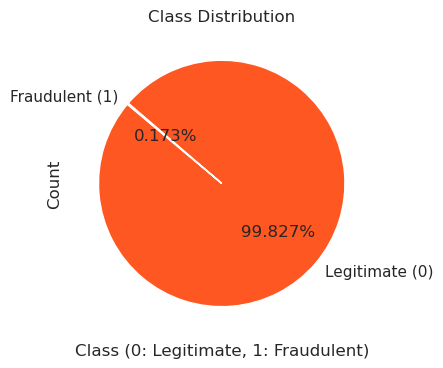

In [6]:
plt.figure(figsize=(6,4))
sns.set_theme(palette="colorblind")
plt.pie(class_dist, labels=['Legitimate (0)', 'Fraudulent (1)'], autopct='%1.3f%%', startangle=140, colors=["#ff5722", 'purple'])
plt.title('Class Distribution')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

from IPython.display import display, HTML
display(HTML(f"""
<div style='background: #f0f8ff; padding: 16px; border-radius: 10px;'>
    <p style="font-size: 18px; font-family: 'Tahoma', Arial, sans-serif; color: #263238;">
        The dataset used here is the <b>Credit Card Fraud Detection</b> dataset from Kaggle, which contains transactions made by credit cards in September 2013 by European cardholders. 
        The dataset includes <b>{df.shape[0]}</b> transactions and <b>{df.shape[1]}</b> features, of which <b>{class_dist[1]}</b> are fraudulent (0.173% of all transactions). 
        The 'Class' column indicates whether a transaction is fraudulent (1) or legitimate (0). The dataset is highly imbalanced, making it a suitable candidate for clustering techniques to identify potential fraud.
    </p>
</div>
"""))

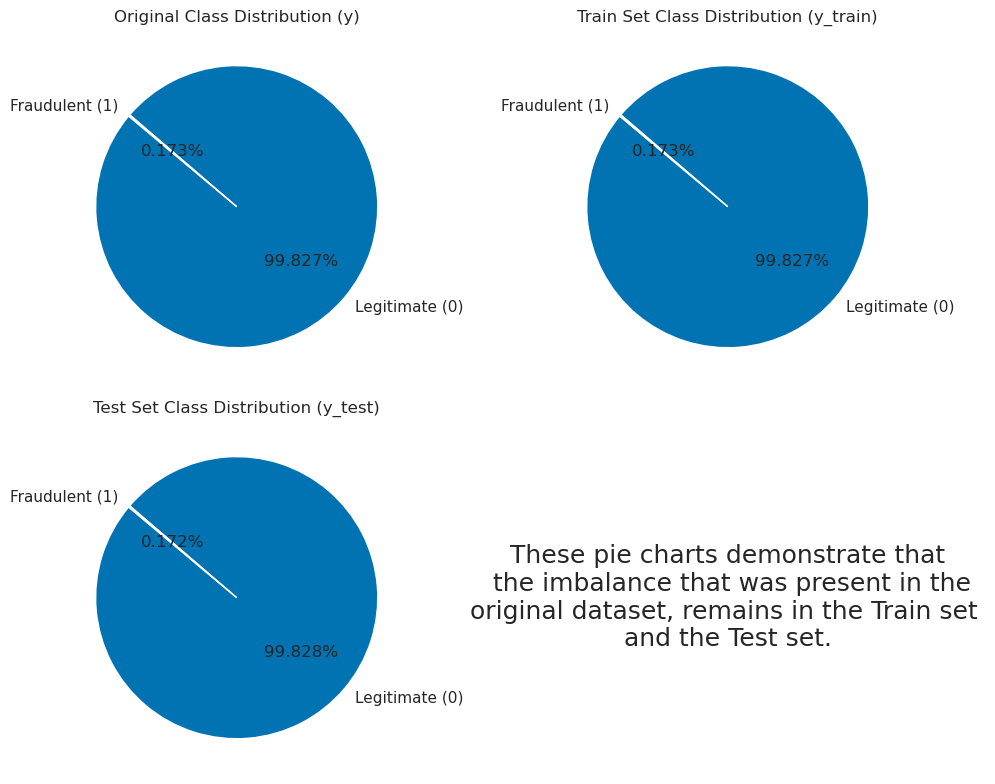

In [7]:
# splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, train_size=0.8, random_state=123, stratify=y)

# Visualizing class distribution in original, train, and test sets
plt.figure(figsize=(10, 8))

# Original dataset
plt.subplot(2, 2, 1)
plt.pie(y.value_counts(), labels=['Legitimate (0)', 'Fraudulent (1)'],
        autopct='%1.3f%%', startangle=140)
plt.title('Original Class Distribution (y)')

# Train set
plt.subplot(2, 2, 2)
plt.pie(y_train.value_counts(), labels=['Legitimate (0)', 'Fraudulent (1)'],
        autopct='%1.3f%%', startangle=140)
plt.title('Train Set Class Distribution (y_train)')

# Test set
plt.subplot(2, 2, 3)
plt.pie(y_test.value_counts(), labels=['Legitimate (0)', 'Fraudulent (1)'],
        autopct='%1.3f%%', startangle=140)
plt.title('Test Set Class Distribution (y_test)')

plt.subplot(2, 2, 4)
plt.text(0.5, 0.5, 'These pie charts demonstrate that\n the imbalance that was present in the\n'
'original dataset, remains in the Train set \nand the Test set.', horizontalalignment='center', verticalalignment='center', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

### Baseline Model or Model 1 

In [8]:
# training a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

# evaluating the logistic regression model
prec1 = precision_score(y_test, y_pred)
rec1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

In [9]:
# presenting classification report as Table
custom_css = """
<style>
.table-bordered {
    border: 1px solid #041f33;
    border-radius: 8px;
    background: #386fa6;
    font-size: 16px;
    margin-bottom: 12px;
}
.table-hover tbody tr:hover {
    background-color: #8222ff;
}
th, td {
    padding: 8px 16px;
    text-align: center;
    border: 1px solid #041f33;
}
</style>
"""
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(index= ['accuracy', 'macro avg', 'weighted avg'])
display(HTML(custom_css+report_df.to_html(classes='table table-striped table-hover', float_format='{:.2f}'.format)))

,precision,recall,f1-score,support
0,1.00,1.00,1.00,56864.00
1,0.84,0.58,0.69,98.00


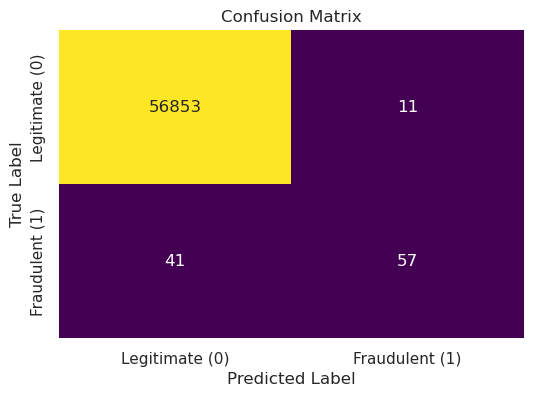

In [10]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Legitimate (0)', 'Fraudulent (1)'],
            yticklabels=['Legitimate (0)', 'Fraudulent (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# getting accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = f"{accuracy*100:.1f}%"
display(HTML(f""" 
    <div style='background: #f0f8ff; padding: 16px; border-radius: 10px;'>
    <p style="font-size: 18px; font-family: 'Tahoma', Arial, sans-serif; color: #263238;">
             The accuracy of the Logistic Regression model trained on the original data is <b>{accuracy_percent}</b>. 
             Accuracy is a misleading metric in this scenario because the dataset is <b>highly imbalanced</b>—the vast majority of transactions are legitimate, 
             and only a tiny fraction are fraudulent. A model could predict every transaction as legitimate and still achieve very high accuracy, 
             but it would fail to detect almost all fraud cases. 
             In such cases, metrics like <b>precision, recall, F1-score, and confusion matrix</b> 
             are more informative, as they show how well the model identifies the minority (fraudulent) class.
             
             """))

## GMM Model for synthetic sampling

### Theoretical Foundation

<div style = "background: #f5f5f5; padding: 16px; border-radius: 10px; color: #000;">
   <h1 style="font-weight: 900; color: #263238; letter-spacing: 0.3px; font-family: Georgia;">Comparison of GMM with SMOTE and Other Resampling Models</h1>

| Feature                | Gaussian Mixture Model (GMM)                | SMOTE (Synthetic Minority Over-sampling Technique)      | Other Resampling Models (e.g., Random Oversampling/Undersampling) |
|------------------------|---------------------------------------------|--------------------------------------------------------|-------------------------------------------------------------------|
| **Approach**           | Probabilistic clustering, models data as a mixture of Gaussians | Generates synthetic samples by interpolating between minority class neighbors | Randomly duplicates or removes samples to balance classes         |
| **Synthetic Data**     | Samples new points from learned Gaussian distributions | Creates new samples along line segments between existing minority samples | Oversampling: duplicates existing samples; Undersampling: removes majority samples |
| **Preserves Structure**| Captures underlying data distribution and covariance | May not fully capture complex data distributions        | Does not model data distribution                                  |
| **Noise Sensitivity**  | Sensitive to outliers and noise in data      | Can generate noisy samples if neighbors are not representative | Can introduce noise by duplicating outliers or removing informative samples |
| **Parameter Tuning**   | Requires selection of number of components (clusters) | Requires setting number of neighbors (k)                | Minimal tuning, but can affect class balance                      |
| **Use Case**           | Useful for anomaly detection and synthetic sampling | Best for tabular data with continuous features          | Simple class balancing, less effective for complex data           |
| **Limitations**        | Assumes Gaussian distribution, may not fit all data types | May create unrealistic samples for highly imbalanced or complex data | May lead to overfitting (oversampling) or loss of information (undersampling) |

**Summary:**  
GMM generates synthetic samples by modeling the data distribution, making it suitable for anomaly detection and complex data structures. SMOTE creates new samples by interpolation, which works well for continuous features but may not capture all data complexities. Other resampling methods are simpler but less sophisticated, potentially introducing noise or losing valuable information.
</div> 

<div style = "background: #f5f5f5; padding: 16px; border-radius: 10px; color: #000;">
   <h1 style="font-weight: 900; color: #263238; letter-spacing: 0.025px; font-family: Georgia;">Why GMM is better at capturing underlying data distributions in complex and imbalanced dataset?</h1>
    <p style="font-size: 19px; font-family: Tahoma; color: #000;">The reason Gaussian Mixture Model (GMM) is often considered better at capturing underlying data distributions in complex and imbalanced datasets, such as credit card fraud detection, compared to methods like SMOTE or other resampling techniques, can be attributed to several key factors:

- GMM models the data as a <em>weighted sum of multiple Gaussian distributions</em>, each representing a cluster/component. This allows it to capture complex, multimodal distributions rather than assuming a single centroid or boundary.

    - Each Gaussian component is defined by its own mean vector $\mu_k$ and covariance matrix $\Sigma_k$, enabling GMM to model clusters with different shapes, orientations, and densities:
        $$
        p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)
        $$
        where $\pi_k$ is the mixing coefficient for component $k$.

- Unlike k-means, which assigns each point to a single cluster, GMM computes the probability of each point belonging to every cluster (responsibilities), allowing for nuanced membership and better handling of overlapping data.

- GMM can learn the true underlying distribution even when classes are imbalanced, as it does not rely on equal sample sizes but rather <em>fits the data density</em>.

-  GMM can generate synthetic samples by <em>sampling from the learned mixture</em>, preserving the statistical properties of the original data—unlike SMOTE or random oversampling, which may ignore feature dependencies.

- GMM uses EM Algorithm to iteratively estimate parameters, maximizing the likelihood of the observed data and refining cluster assignments based on probability.

-  Points with low likelihood under the fitted GMM are <strong>flagged as anomalies</strong>, making it naturally suited for fraud detection tasks.</p>

### GMM Implementation

In [12]:
# implementing GMM for oversampling
from sklearn.mixture import GaussianMixture
from collections import Counter
# Function to perform GMM-based oversampling
def gmm_oversample(X, y, n_components=2, random_state=42):
    # Separate majority and minority classes
    X_majority = X[y == 0]
    X_minority = X[y == 1]
    
    # Fit GMM to the minority class
    gmm = GaussianMixture(n_components=n_components, random_state=random_state)
    gmm.fit(X_minority)
    
    # Generate synthetic samples
    n_samples_to_generate = len(X_majority) - len(X_minority)
    synthetic_samples, _ = gmm.sample(n_samples_to_generate)
    
    # Create new dataset
    X_resampled = np.vstack((X_majority, X_minority, synthetic_samples))
    y_resampled = np.hstack((np.zeros(len(X_majority)), np.ones(len(X_minority)), np.ones(n_samples_to_generate)))
    
    return X_resampled, y_resampled

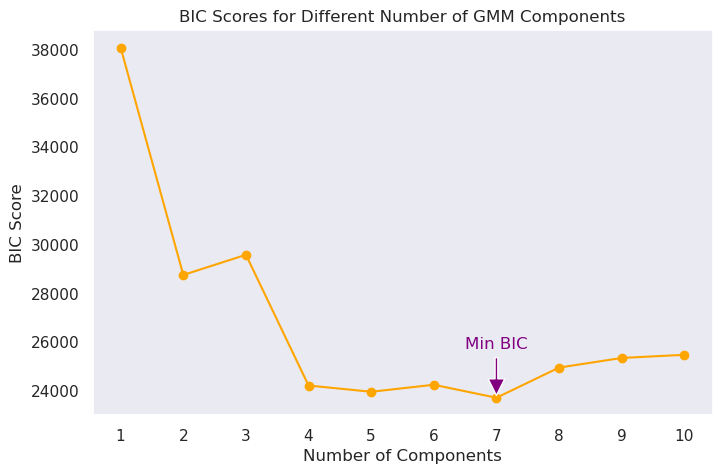

In [13]:
# finding optimal number of components using BIC
bic_scores = []
n_components_range = range(1, 11)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_train[y_train == 1])  # Fit only on minority class
    bic_scores.append(gmm.bic(X_train[y_train == 1]))

# plotting BIC scores
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, bic_scores, marker='o', color="orange")
plt.title('BIC Scores for Different Number of GMM Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.xticks(n_components_range)
min_idx = np.argmin(bic_scores)
plt.annotate('Min BIC', xy=(n_components_range[min_idx], bic_scores[min_idx]),
             xytext=(n_components_range[min_idx], bic_scores[min_idx]+2000),
             arrowprops=dict(facecolor='purple', shrink=0.05, width=2),
             fontsize=12, color='purple', ha='center')
plt.grid()
plt.show()

<div style = "background: #f5f5f5; padding: 16px; border-radius: 10px; color: #000;">
   <b>Determining the Optimal Number of Components</b>
    <p style="font-size: 19px; font-family: Tahoma; color: #000;">We want the number of parameters that give high <em>goodness of fit</em> while being as less complicated as possible i.e. they should have <em>as less number of parameters as possible</em>. I have used Bayesian Information Criterion (BIC) to determine the desired number of components. BIC increases as the goodness of fit increases but at the same time it decreases with more number of component, thus balancing the two factors. The n_components that gives minimum BIC is the optimal number of components.</p>

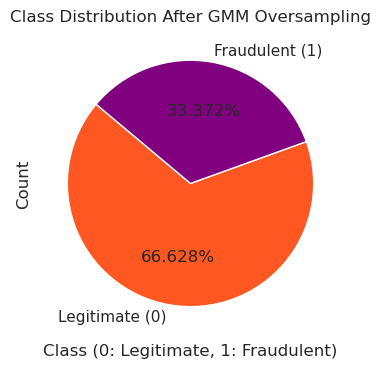

In [14]:
# fitting GMM to the training data of the minority class
X_resampled, y_resampled = gmm_oversample(X_train.values, y_train.values, n_components=n_components_range[min_idx], random_state=42)

# combining newly generated samples with original training data
X_train_gmm = np.vstack((X_train.values, X_resampled))
y_train_gmm = np.hstack((y_train.values, y_resampled))
# plotting the class distribution after GMM oversampling and combining with original data
plt.figure(figsize=(6,4))
sns.set_theme(palette="colorblind")
plt.pie(Counter(y_train_gmm).values(), labels=['Legitimate (0)', 'Fraudulent (1)'],
        autopct='%1.3f%%', startangle=140, colors=["#ff5722", 'purple'])
plt.title('Class Distribution After GMM Oversampling')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

display(HTML(f"""
<div style='background: #f0f8ff; padding: 16px; border-radius: 10px; font-size: 16px; color: #263238;'>
    <b>Class Distribution after GMM oversampling:</b><br>
    Legitimate (0): <b>{Counter(y_train_gmm)[0]}</b><br>
    Fraudulent (1): <b>{Counter(y_train_gmm)[1]}</b>
</div>
"""))

<div style = "background: #f5f5f5; padding: 16px; border-radius: 10px; color: #000;">
   <p style="font-size: 19px; font-family: Tahoma; color: #000;">After resampling and combining the GMM resampled with original training data, we see that there is still 2:1 imbalance between Legitimate and Fraudulent classes. Therefore, I'd now reduce the size of majority class using CBU and then match the minority class with majority class by GMM which will create a balanced dataset</p>

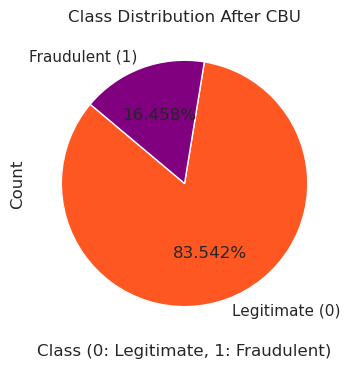

In [15]:
# Rebalancing with CBU
from imblearn.under_sampling import ClusterCentroids
cbu = ClusterCentroids(sampling_strategy={0:2000}, random_state=42)
X_cbu, y_cbu = cbu.fit_resample(X_train, y_train)
# plotting the class distribution after CBU
plt.figure(figsize=(6,4))
sns.set_theme(palette="colorblind")
plt.pie(Counter(y_cbu).values(), labels=['Legitimate (0)', 'Fraudulent (1)'],
        autopct='%1.3f%%', startangle=140, colors=["#ff5722", 'purple'])
plt.title('Class Distribution After CBU')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

In [16]:
# class distribution after CBU
display(HTML(f"""
<div style='background: #f0f8ff; padding: 16px; border-radius: 10px; font-size: 16px; color: #263238;'>
    <b>Class Distribution after CBU:</b><br>
    Legitimate (0): <b>{Counter(y_cbu)[0]}</b><br>
    Fraudulent (1): <b>{Counter(y_cbu)[1]}<b>
</div>
"""))

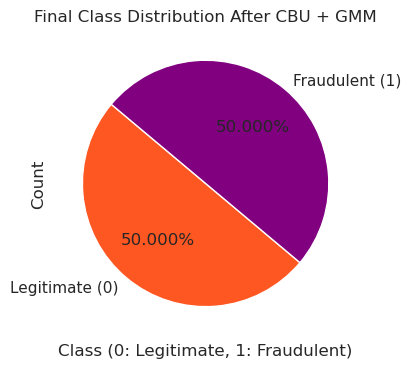

In [17]:
# matching minority class with majority class by GMM
X_resampled_final, y_resampled_final = gmm_oversample(X_cbu, y_cbu, n_components=n_components_range[min_idx], random_state=42)
# final training data after CBU and GMM
plt.figure(figsize=(6,4))
sns.set_theme(palette="colorblind")
plt.pie(Counter(y_resampled_final).values(), labels=['Legitimate (0)', 'Fraudulent (1)'],
        autopct='%1.3f%%', startangle=140, colors=["#ff5722", 'purple'])
plt.title('Final Class Distribution After CBU + GMM')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

<div style = "background: #f5f5f5; padding: 16px; border-radius: 10px; color: #000;">
   <p style="font-size: 19px; font-family: Tahoma; color: #000;">I have used Cluster Based Undersampling (CBU) to rebalance the dataset before fitting GMM. CBU uses KMeans clustering to identify clusters in the majority class and then undersamples each cluster. The majority class was reduced to a suitable population of 2000 then minority class was matched to it by GMM. Thus we have a well-balanced dataset. Let's train a <strong>Logistic Regression</strong> model on this balanced dataset?</p>

### Training the Model and Evaluation

In [18]:
# training logistic regression on the rebalanced data
log_gmm = LogisticRegression()
log_gmm.fit(X_resampled_final, y_resampled_final)
y_pred_gmm = log_gmm.predict(X_test.values)


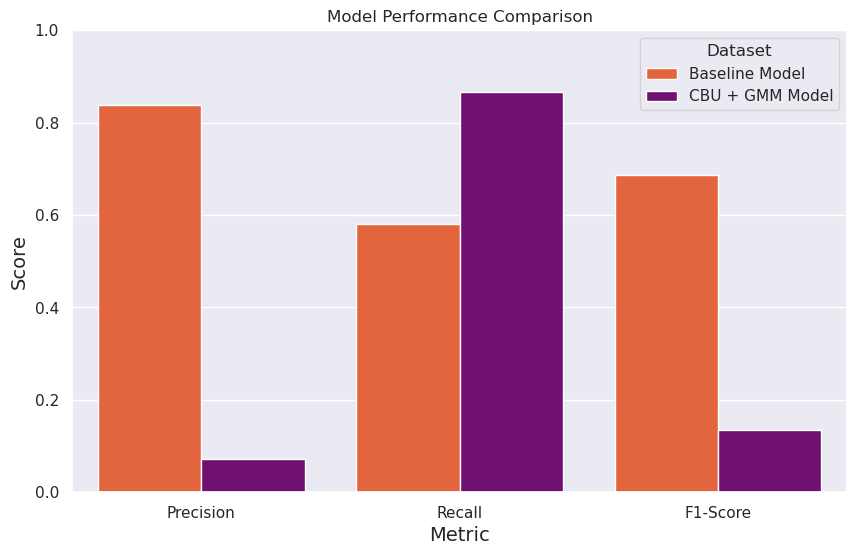

In [19]:
# evaluating the logistic regression model trained on rebalanced data
prec2 = precision_score(y_test, y_pred_gmm)
rec2 = recall_score(y_test, y_pred_gmm)
f1_2 = f1_score(y_test, y_pred_gmm)

# comparing results of both models
comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Baseline Model': [prec1, rec1, f1_1],
    'CBU + GMM Model': [prec2, rec2, f1_2]
})
# plotting comparison 
comparison_df_melted = comparison_df.melt(id_vars='Metric', var_name='Dataset', value_name='Score')
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df_melted, x='Metric', y='Score', hue='Dataset', palette=['#ff5722', 'purple'])
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Dataset')
plt.show()

display(HTML(f"""
<div style='background: #f0f8ff; padding: 16px; border-radius: 10px;'>
    <p style="font-size: 18px; font-family: 'Tahoma', Arial, sans-serif; color: #263238;">
        The Recall score has significantly improved from <b>{rec1:.3f}</b> to <b>{rec2:.3f}</b> after applying CBU and GMM for rebalancing the dataset."""))

<div style = "background: #f5f5f5; padding: 16px; border-radius: 10px; color: #000;">
   <p style="font-size: 19px; font-family: Tahoma; color: #000;">Now we have the metric scores for Logistic Regression model for both the original data and the Rebalanced Data. You may have noticed that Precision and F1-Score are both way higher for the first model than the CBU+GMM model. But don't let this mislead you. The most important metric is <strong><em>Recall score</em></strong> which is how many of the actual frauds were correctly identified and flagged. This is what we are really interested in. We want a model that is as good at detecting the fraudulent cases as it can be.</p>

## CONCLUSION


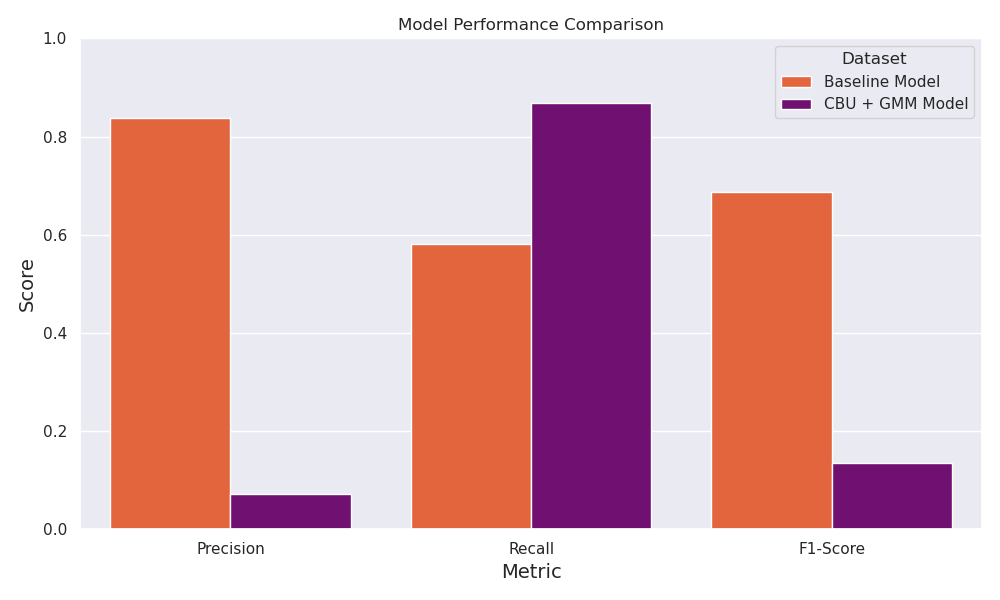

In [20]:
from IPython.display import display, HTML
import io
import base64

# Save your comparison plot to a buffer
buf = io.BytesIO()
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df_melted, x='Metric', y='Score', hue='Dataset', palette=['#ff5722', 'purple'])
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Dataset')
plt.tight_layout()
plt.savefig(buf, format='png')
plt.close()
buf.seek(0)
plot_data = base64.b64encode(buf.read()).decode('utf-8')

# Display side-by-side
display(HTML(f"""
<div style="display: flex; gap: 32px; align-items: flex-start;">
  <div>
    <img src="perfcomp.png" style="max-width:650px; border-radius:10px;"/>
    <p style="text-align:center; font-size:16px;">Comparison of CBU and other models</p>
  </div>
  <div>
    <img src="data:image/png;base64,{plot_data}" style="max-width:650px; border-radius:10px;"/>
    <p style="text-align:center; font-size:16px;">Comparison of CBU+GMM with Baseline Model</p>
  </div>
</div>
"""))

<div style = "background: #f5f5f5; padding: 16px; border-radius: 10px; color: #000;">
   <h2 style="color:#000; font-size:18px; font-weight:666">What is the best model to detect fraud?</h2>
   <p>We want a model that accurately flags the actual fraudulent cases. We can afford to have some false positive error but we <em>can not</em> afford to have a <em>false negative</em> (i.e. missing an actual fraud) error. We can observe from the comparison of baseline model and CBU+GMM model as well as of CBU with oversampling models that Both the CBU and CBU+GMM models give ~90% recall score, thus they identify the fraud cases better than every other model.</p>
   <p>I would recommend CBU+GMM model over the CBU-only model because CBU+GMM is better than CBU-only because it not only reduces the number of normal transactions to make the data balanced, but also creates new fake fraud examples that look like real frauds. This helps the model learn what fraud really looks like, instead of just guessing from a small number of real frauds. If you use only CBU, you just throw away normal data and keep the few frauds you have, which isn’t enough for the model to learn well. With CBU+GMM, the model gets more realistic fraud cases to train on, so it can spot fraud much better in new data.</p>
   </div>

<div style="background: #e9f7f7; padding: 18px; border-radius: 12px; color: #263238; margin-top: 20px;">
    <h2 style="font-size: 20px; font-weight: bold;">Final Thoughts</h2>
    <p style="font-size: 17px; font-family: Tahoma;">
        In the battle against fraud, data imbalance is the enemy and smart resampling is the weapon. By combining Cluster-Based Undersampling with the power of Gaussian Mixture Models, we’ve built a model that doesn’t just guess—it learns what fraud really looks like. This approach transforms a handful of fraud cases into a robust training ground, giving our model the edge it needs to catch the bad guys. Remember: in fraud detection, it’s not about being perfect—it’s about being precise, relentless, and always one step ahead.
    </p>
</div>